In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib import cm
from matplotlib.colors import Normalize


nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('DataAnalyst.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Identify missing values
missing_values = df.isnull()

# Display missing values
print(missing_values.sum())

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


In [3]:
# Drop rows with missing values
df.dropna(inplace=True)

# Display missing values
print(missing_values.sum())

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2252 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2252 non-null   int64  
 1   Job Title          2252 non-null   object 
 2   Salary Estimate    2252 non-null   object 
 3   Job Description    2252 non-null   object 
 4   Rating             2252 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2252 non-null   object 
 7   Headquarters       2252 non-null   object 
 8   Size               2252 non-null   object 
 9   Founded            2252 non-null   int64  
 10  Type of ownership  2252 non-null   object 
 11  Industry           2252 non-null   object 
 12  Sector             2252 non-null   object 
 13  Revenue            2252 non-null   object 
 14  Competitors        2252 non-null   object 
 15  Easy Apply         2252 non-null   object 
dtypes: float64(1), int64(2), obje

In [5]:
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [6]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [7]:
df['Job Title'].value_counts()

Job Title
Data Analyst                        404
Senior Data Analyst                  90
Junior Data Analyst                  30
Business Data Analyst                28
Sr. Data Analyst                     21
                                   ... 
Data Analyst – Level II               1
Data Analyst/Programmer               1
Data Services Business Analyst 2      1
Call Center Data Analyst              1
Senior Quality Data Analyst           1
Name: count, Length: 1272, dtype: int64

In [8]:
df['Rating'].value_counts()

Rating
-1.0    271
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 1.0     10
 2.4     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.7      2
 1.8      2
 1.6      2
 1.9      2
Name: count, dtype: int64

In [9]:
df['Company Name'].head(20)

0              Vera Institute of Justice\n3.2
1     Visiting Nurse Service of New York\n3.8
2                            Squarespace\n3.4
3                               Celerity\n4.1
4                                FanDuel\n3.9
5                                Point72\n3.9
6                              Two Sigma\n4.4
7                GNY Insurance Companies\n3.7
8                                   DMGT\n4.0
9                              Riskified\n4.4
10                    NYU Langone Health\n4.0
11                                   BulbHead
12                    Montefiore Medical\n3.7
13                                 Known\n3.0
14                         Advisor Group\n3.4
15                   CodeGreen Solutions\n3.6
16                             Undertone\n3.8
17                                NYSTEC\n3.8
18    Education Development Center, Inc.\n3.9
19                 Teachers Pay Teachers\n4.9
Name: Company Name, dtype: object

In [10]:
# Clean the "Company Name" column
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

# Remove leading and trailing whitespaces
df['Company Name'] = df['Company Name'].str.strip()

In [11]:
df['Company Name'].head(20)

0              Vera Institute of Justice
1     Visiting Nurse Service of New York
2                            Squarespace
3                               Celerity
4                                FanDuel
5                                Point72
6                              Two Sigma
7                GNY Insurance Companies
8                                   DMGT
9                              Riskified
10                    NYU Langone Health
11                              BulbHead
12                    Montefiore Medical
13                                 Known
14                         Advisor Group
15                   CodeGreen Solutions
16                             Undertone
17                                NYSTEC
18    Education Development Center, Inc.
19                 Teachers Pay Teachers
Name: Company Name, dtype: object

In [12]:
df[ 'Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2252, dtype: object

In [13]:
df[['Rating', 'Company Name', 'Salary Estimate','Revenue']]

,Rating,Company Name,Salary Estimate,Revenue
0,3.2,Vera Institute of Justice,$37K-$66K (Glassdoor est.),$100 to $500 million (USD)
1,3.8,Visiting Nurse Service of New York,$37K-$66K (Glassdoor est.),$2 to $5 billion (USD)
2,3.4,Squarespace,$37K-$66K (Glassdoor est.),Unknown / Non-Applicable
3,4.1,Celerity,$37K-$66K (Glassdoor est.),$50 to $100 million (USD)
4,3.9,FanDuel,$37K-$66K (Glassdoor est.),$100 to $500 million (USD)
...,...,...,...,...
2248,2.5,"Avacend, Inc.",$78K-$104K (Glassdoor est.),Unknown / Non-Applicable
2249,2.9,Arrow Electronics,$78K-$104K (Glassdoor est.),$10+ billion (USD)
2250,-1.0,Spiceorb,$78K-$104K (Glassdoor est.),-1
2251,3.1,Contingent Network Services,$78K-$104K (Glassdoor est.),$25 to $50 million (USD)


In [14]:
# Preprocess the "Salary Estimate" column
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '')
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '')
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Glassdoor est.', '')
df[['Salary Min', 'Salary Max']] = df['Salary Estimate'].str.split('-', expand=True)

df[['Salary Min', 'Salary Max']] = df['Salary Estimate'].str.split('-', expand=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Glassdoor est.', '')

df[['Salary Min', 'Salary Max']] = df[['Salary Min', 'Salary Max']].replace('Glassdoor est.', '')
df[['Salary Min', 'Salary Max']] = df[['Salary Min', 'Salary Max']].replace(r'\(|\)', '', regex=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(|\)', '', regex=True)
df['Salary Min'] = pd.to_numeric(df['Salary Min'], errors='coerce').fillna(0).astype(int)
df['Salary Max'] = pd.to_numeric(df['Salary Max'], errors='coerce').astype(int)
df['Salary Average'] = ((df['Salary Min'] + df['Salary Max']) / 2).astype(int)
df.head()  

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max,Salary Average
0,0,"Data Analyst, Center on Immigration and Justic...",37-66,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66,51
1,1,Quality Data Analyst,37-66,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37,66,51
2,2,"Senior Data Analyst, Insights & Analytics Team...",37-66,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37,66,51
3,3,Data Analyst,37-66,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37,66,51
4,4,Reporting Data Analyst,37-66,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,51


In [15]:
df[['Rating', 'Company Name', 'Salary Estimate','Revenue']]

,Rating,Company Name,Salary Estimate,Revenue
0,3.2,Vera Institute of Justice,37-66,$100 to $500 million (USD)
1,3.8,Visiting Nurse Service of New York,37-66,$2 to $5 billion (USD)
2,3.4,Squarespace,37-66,Unknown / Non-Applicable
3,4.1,Celerity,37-66,$50 to $100 million (USD)
4,3.9,FanDuel,37-66,$100 to $500 million (USD)
...,...,...,...,...
2248,2.5,"Avacend, Inc.",78-104,Unknown / Non-Applicable
2249,2.9,Arrow Electronics,78-104,$10+ billion (USD)
2250,-1.0,Spiceorb,78-104,-1
2251,3.1,Contingent Network Services,78-104,$25 to $50 million (USD)


In [16]:
df[['Rating', 'Company Name', 'Salary Estimate','Revenue']]

,Rating,Company Name,Salary Estimate,Revenue
0,3.2,Vera Institute of Justice,37-66,$100 to $500 million (USD)
1,3.8,Visiting Nurse Service of New York,37-66,$2 to $5 billion (USD)
2,3.4,Squarespace,37-66,Unknown / Non-Applicable
3,4.1,Celerity,37-66,$50 to $100 million (USD)
4,3.9,FanDuel,37-66,$100 to $500 million (USD)
...,...,...,...,...
2248,2.5,"Avacend, Inc.",78-104,Unknown / Non-Applicable
2249,2.9,Arrow Electronics,78-104,$10+ billion (USD)
2250,-1.0,Spiceorb,78-104,-1
2251,3.1,Contingent Network Services,78-104,$25 to $50 million (USD)


In [17]:
# Find the maximum value of 'Salary Max' column
max_salary = df['Salary Max'].max()
print(max_salary)

# Filter the DataFrame for 'Salary Min' values greater than 1
filtered = df[df['Salary Min'] > 1]

# Find the minimum value of 'Salary Min' column after filtering
min_value = filtered['Salary Min'].min()
print(min_value)

190
24


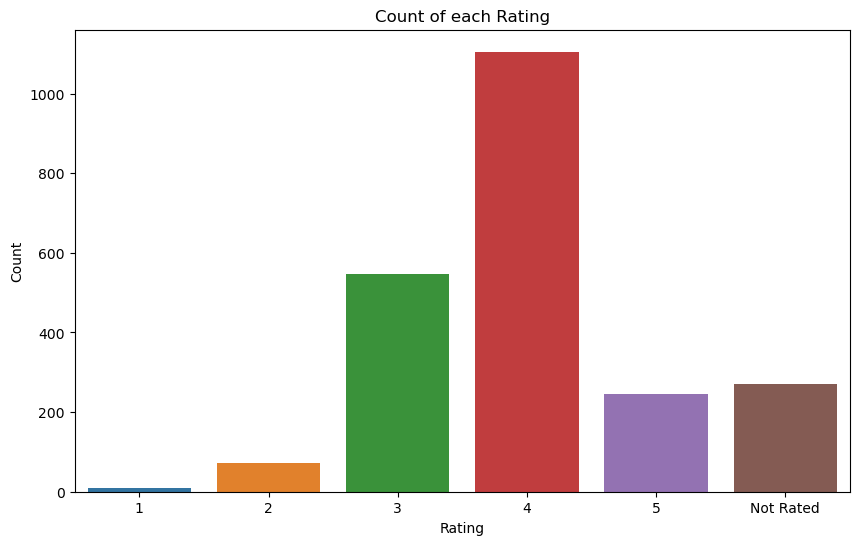

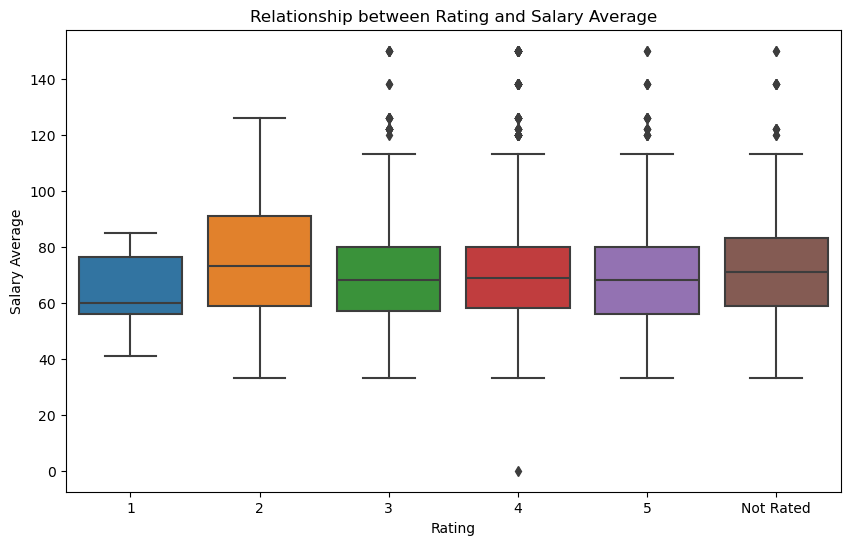

In [18]:
###Countplot and Boxplot

# Create a copy of the DataFrame
df_filtered = df.copy()

# Replace -1 with 'Not Rated' in the 'Rating_round' column
df_filtered['Rating_round'] = df_filtered['Rating'].apply(lambda x: 'Not Rated' if x == -1 else round(x))

# Define the desired order of ratings
rating_order = [ 1, 2, 3, 4, 5,'Not Rated']

# Group the data by rounded ratings and calculate the mean salary and count
df_grouped = df_filtered.groupby('Rating_round').agg({'Salary Average': 'mean', 'Rating': 'count'}).reset_index()
df_grouped = df_grouped.rename(columns={'Rating': 'Rating Count'})

# Plot count of each rating
plt.figure(figsize=(10, 6))
sns.countplot(x=df_filtered['Rating_round'], order=rating_order)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of each Rating')
plt.show()

# Plot relationship between rating and salary average
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Rating_round'], y=df_filtered['Salary Average'], order=rating_order)
plt.xlabel('Rating')
plt.ylabel('Salary Average')
plt.title('Relationship between Rating and Salary Average')
plt.show()

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


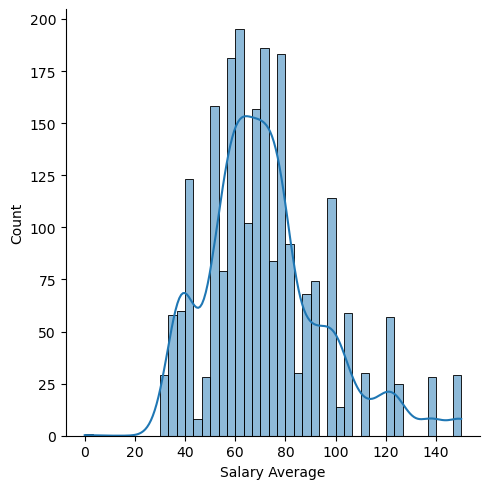

In [19]:
###Kernel density plot with 'Salary Average'

# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot the distribution of 'Salary Average' with a kernel density estimate
sns.displot(data=df, x='Salary Average', kde=True)

# Display the plot
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_39988\3581134892.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')  # Get colormap


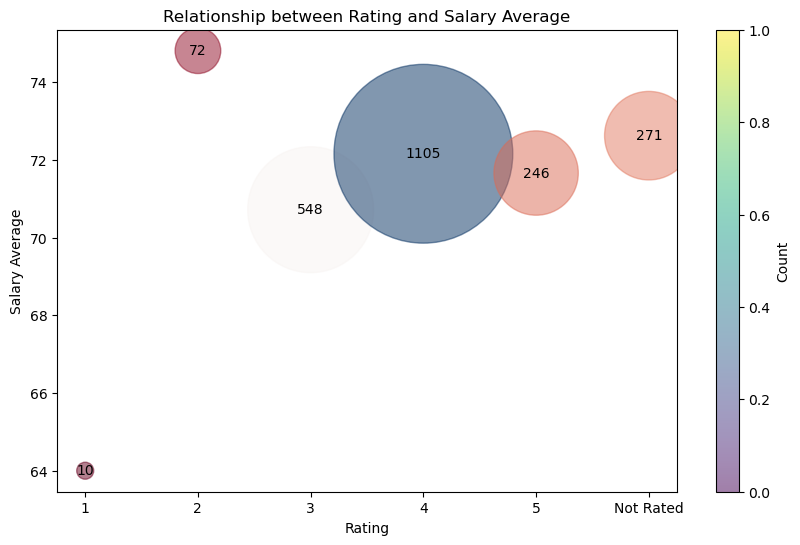

In [20]:
###Bubble plot

df_grouped['Rating_round'] = df_grouped['Rating_round'].replace(-1.0, 'Not Rated')  # Replace -1.0 with 'Not Rated' in Rating_round column
df_grouped['Rating_round'] = df_grouped['Rating_round'].fillna('Not Rated').astype(str)  # Fill missing values with 'Not Rated' and convert to string
df_grouped = df_grouped.rename(columns={'Rating': 'Rating Count'})  # Rename 'Rating' column to 'Rating Count'

cmap = cm.get_cmap('RdBu')  # Get colormap
norm = Normalize(vmin=df_grouped['Rating Count'].min(), vmax=df_grouped['Rating Count'].max())  # Normalize the Rating Count values

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis

# Scatter plot
sc = ax.scatter(df_grouped['Rating_round'], df_grouped['Salary Average'], s=df_grouped['Rating Count']*15, alpha=0.5, c=cmap(norm(df_grouped['Rating Count'])))
# Set x-axis label
ax.set_xlabel('Rating')
# Set y-axis label
ax.set_ylabel('Salary Average')
# Set plot title
ax.set_title('Relationship between Rating and Salary Average')

# Add text labels for each data point
for i in range(df_grouped.shape[0]):
    ax.text(df_grouped['Rating_round'].iloc[i], df_grouped['Salary Average'].iloc[i], df_grouped['Rating Count'].iloc[i], ha='center', va='center', color='black')

# Add colorbar
fig.colorbar(sc, ax=ax, label='Count', cmap='RdBu')

# Display the plot
plt.show()

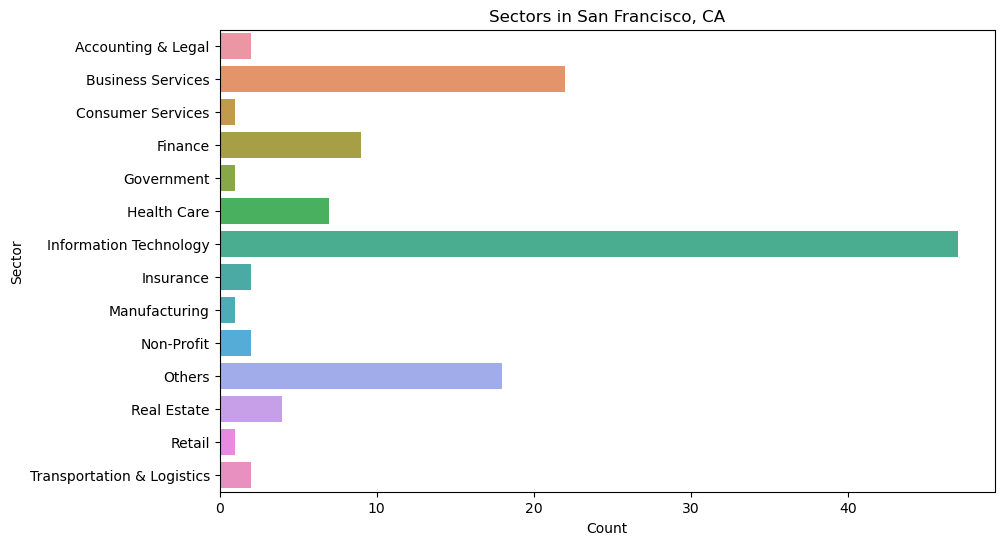

In [21]:
###Bar plot with plot_sector

#Defines the function and calls it with the argument 3 to generate the bar plot for the desired rank

def plot_sector_counts(rank):
    # Replace -1 with 'Others' in the 'Sector' column
    df['Sector'] = df['Sector'].replace("-1", 'Others')

    sector_counts = df.groupby(['Location', 'Sector']).size().reset_index(name='Counts')
    location_counts = sector_counts.groupby('Location')['Counts'].sum().reset_index()

    sorted_location_counts = location_counts.sort_values(by='Counts', ascending=False)

    nth_max_sector_location = sorted_location_counts['Location'].iloc[rank-1]

    nth_max_sector_location_data = sector_counts[sector_counts['Location'] == nth_max_sector_location]

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Counts', y='Sector', data=nth_max_sector_location_data, errcolor='black', errwidth=0)
    plt.xlabel('Count')
    plt.ylabel('Sector')
    plt.title(f'Sectors in {nth_max_sector_location}')

    plt.show()

plot_sector_counts(3)

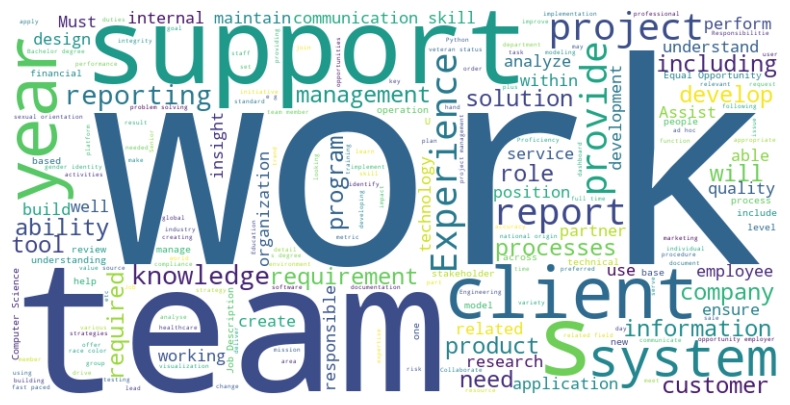

In [22]:
###WordCloud###

# Concatenate the two columns into a single string
text = ' '.join(df['Job Title']) + ' ' + ' '.join(df['Job Description'])

# Tokenize the text into individual words
tokens = word_tokenize(text)

# Define the keywords you want to drop
unwanted_keywords = ["data", "analyst", "experience", "analysis", "Data Analyst", "Ability", "business", "analytic" ]  # Add your unwanted keywords here

# Remove the unwanted keywords from the text
for keyword in unwanted_keywords:
    text = text.replace(keyword, "")

# Remove stopwords and common verbs
stop_words = set(stopwords.words('english'))
common_verbs = ['is', 'are', 'was', 'were', 'be', 'been', 'am', 'being', 'do', 'does', 'did', 'doing', 'have', 'has', 'had', 'having']
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() not in common_verbs]

# Join the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

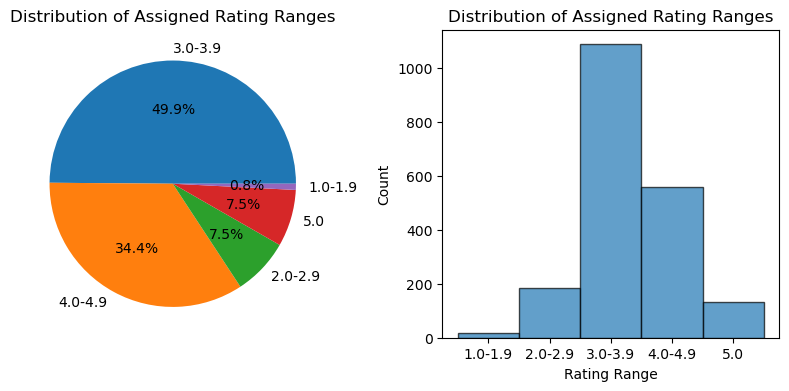

In [23]:
###Pie chart and histogram

# Define the bin edges and labels
bin_edges = [0, 1.9, 2.9, 3.9, 4.9, 5.1]  # The edges include the lower boundary and exclude the upper boundary
bin_labels = ['1.0-1.9', '2.0-2.9', '3.0-3.9', '4.0-4.9', '5.0']

# Create a new column with the assigned ranges
df['Rating Range'] = pd.cut(df['Rating'], bins=bin_edges, labels=bin_labels, right=False)

# Count the frequency of each assigned rating range
rating_range_counts = df['Rating Range'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the pie chart on the first subplot
ax1.pie(rating_range_counts, labels=rating_range_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Assigned Rating Ranges')

# Plot the histogram on the second subplot
ax2.hist(df['Rating'], bins=[1, 2, 3, 4, 5, 6], edgecolor='black', alpha=0.7)
ax2.set_xticks([1.5, 2.5, 3.5, 4.5, 5.5])
ax2.set_xticklabels(['1.0-1.9', '2.0-2.9', '3.0-3.9', '4.0-4.9', '5.0'])
ax2.set_xlabel('Rating Range')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Assigned Rating Ranges')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the combined chart
plt.show()

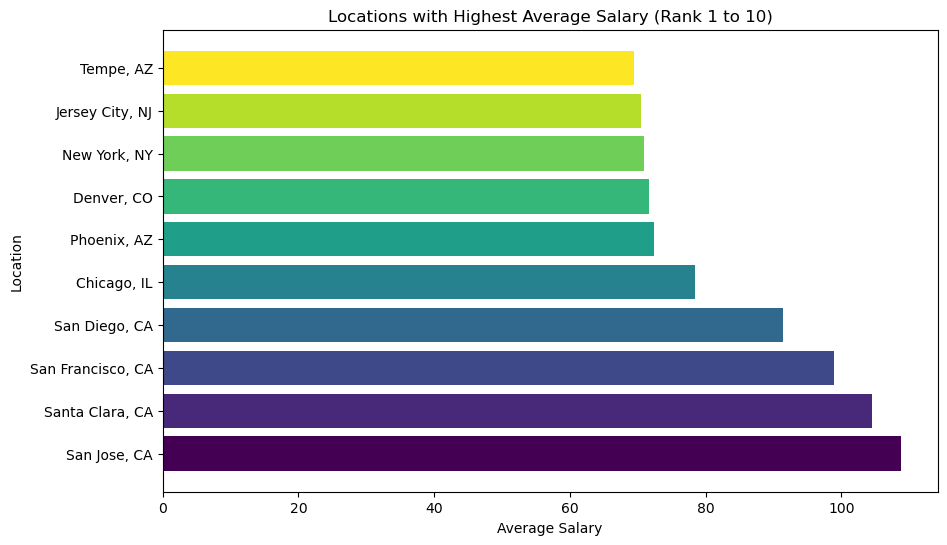

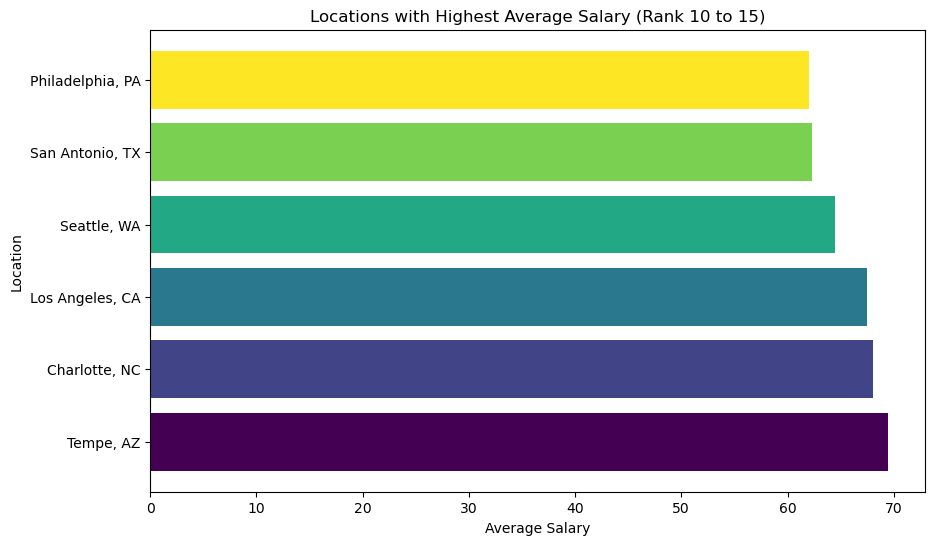

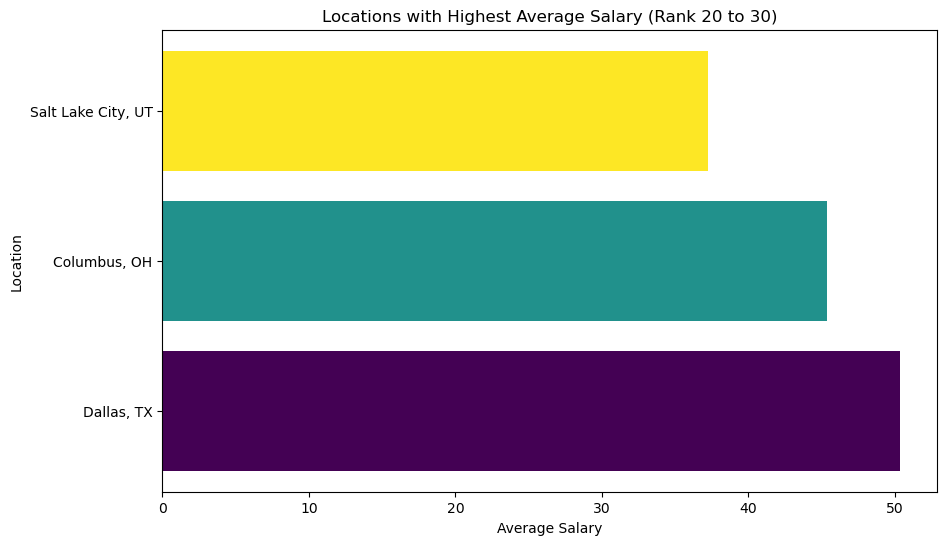

In [24]:
###Horizontal bar chart

def plot_average_salaries(start_rank, end_rank):
    # Calculate the sample counts for each location
    location_counts = df['Location'].value_counts().reset_index()
    location_counts.columns = ['Location', 'Count']

    # Filter locations with sample counts greater than the specified threshold
    locations_with_enough_samples = location_counts[location_counts['Count'] > 20]['Location']

    # Calculate the average salary for each location
    average_salary_by_location = df[df['Location'].isin(locations_with_enough_samples)].groupby('Location')['Salary Average'].mean().reset_index()

    # Sort locations based on average salary
    sorted_average_salary_by_location = average_salary_by_location.sort_values(by='Salary Average', ascending=False)

    # Select the data for the specified rank range
    average_salaries_in_rank_range = sorted_average_salary_by_location.iloc[start_rank-1:end_rank]

    # Generate colors for the bars
    num_bars = len(average_salaries_in_rank_range)
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, num_bars))

    # Plot bar chart using matplotlib
    plt.figure(figsize=(10, 6))
    plt.barh(average_salaries_in_rank_range['Location'], average_salaries_in_rank_range['Salary Average'], color=colors)
    plt.xlabel('Average Salary')
    plt.ylabel('Location')
    plt.title(f'Locations with Highest Average Salary (Rank {start_rank} to {end_rank})')
    plt.show()

plot_average_salaries(1, 10)
plot_average_salaries(10, 15)
plot_average_salaries(20, 30)

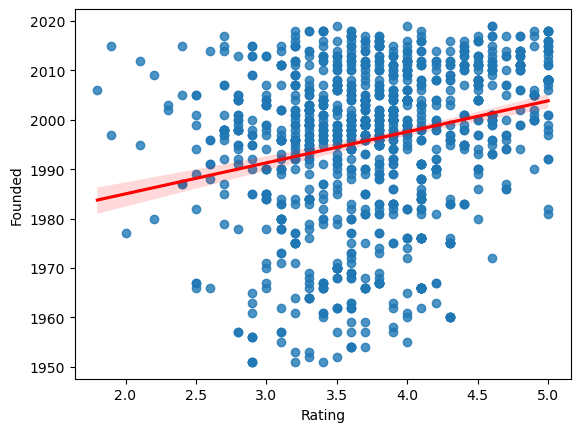

In [25]:
###Scatter plot with a regression line

# Convert 'Rating' column to numeric, replacing any non-numeric values with NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Convert 'Founded' column to numeric, replacing any non-numeric values with NaN
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

# Filter out data where 'Founded' is -1 and keep only data where 'Founded' is after 1950
df = df[(df['Founded'] != -1) & (df['Rating'] != -1) & (df['Founded'] > 1950)]

# Create a scatter plot and add a regression line
sns.regplot(x='Rating', y='Founded', data=df, line_kws={"color": "red"})
plt.show()